<a href="https://colab.research.google.com/github/bhuvana10102005/Phase2/blob/main/project_phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset from local file
df = pd.read_csv("tweet_emotions.csv")
print(df.head())

     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


In [ ]:
import pandas as pd
import re
import string

# Load dataset
df = pd.read_csv("tweet_emotions.csv")  # Replace with full path if needed

# Define text cleaning function
def clean_text(text):
    text = re.sub(r"http\\S+|www\\S+", "", text)  # remove URLs
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)    # remove mentions
    text = re.sub(r"#[A-Za-z0-9_]+", "", text)    # remove hashtags
    text = re.sub(r"[^\x00-\x7F]+", "", text)     # remove emojis
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = text.lower().strip()                   # convert to lowercase and strip whitespace
    return text

# Apply cleaning to the dataset
df["cleaned"] = df["content"].apply(clean_text)

# Display the original and cleaned text
print(df[["content", "cleaned"]].head())

                                             content  \
0  @tiffanylue i know  i was listenin to bad habi...   
1  Layin n bed with a headache  ughhhh...waitin o...   
2                Funeral ceremony...gloomy friday...   
3               wants to hang out with friends SOON!   
4  @dannycastillo We want to trade with someone w...   

                                             cleaned  
0  i know  i was listenin to bad habit earlier an...  
1  layin n bed with a headache  ughhhhwaitin on y...  
2                      funeral ceremonygloomy friday  
3                wants to hang out with friends soon  
4  we want to trade with someone who has houston ...  


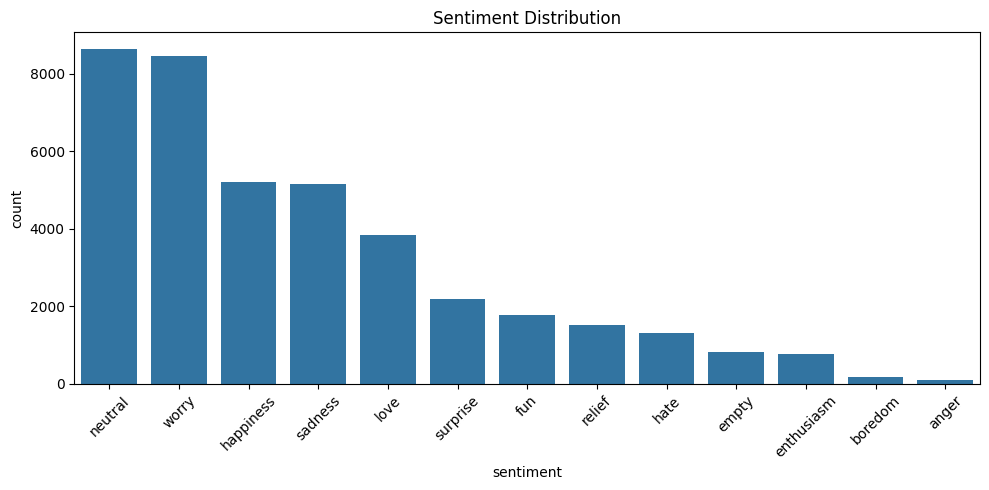

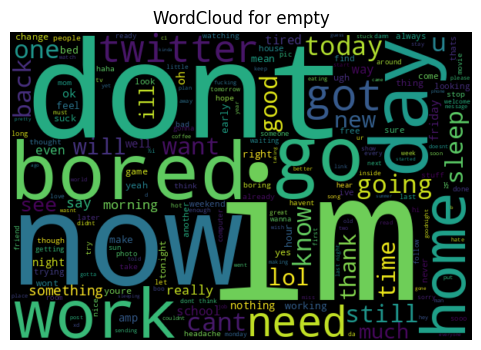

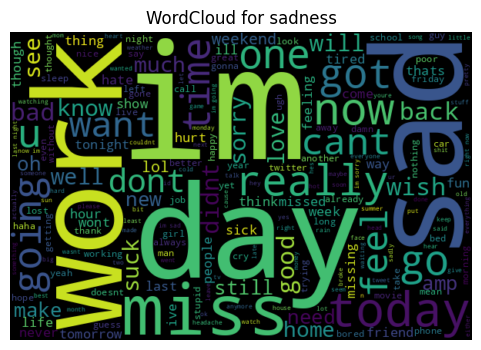

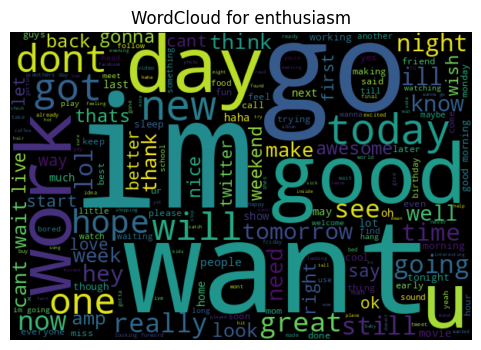

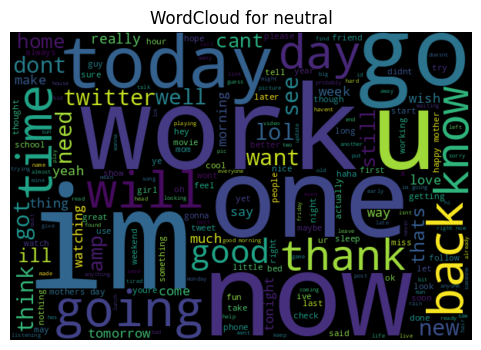

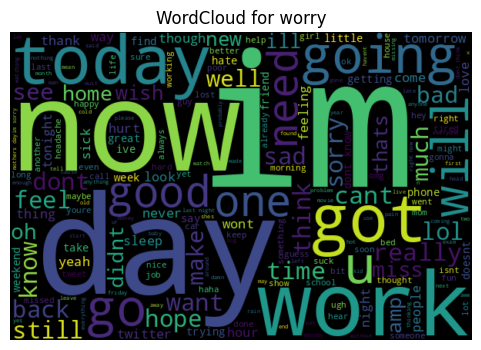

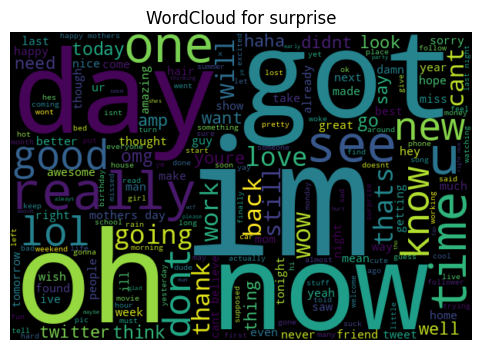

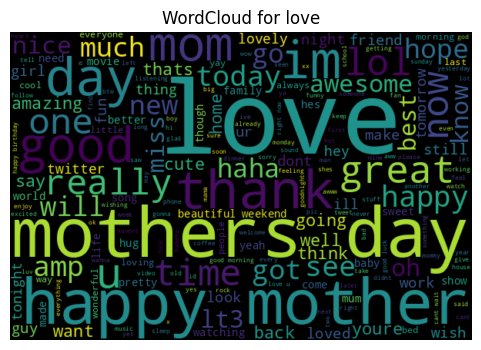

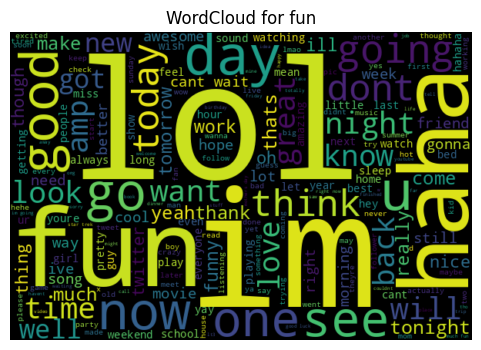

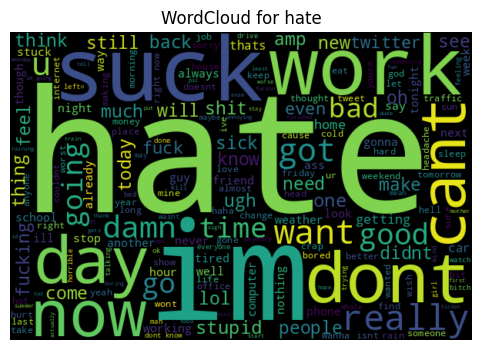

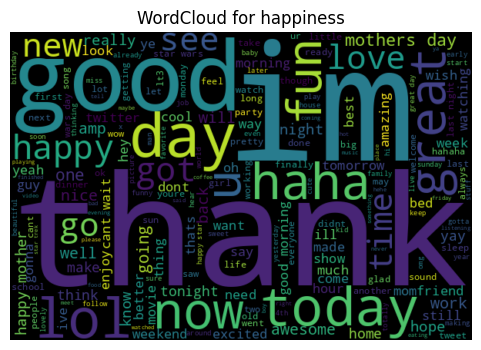

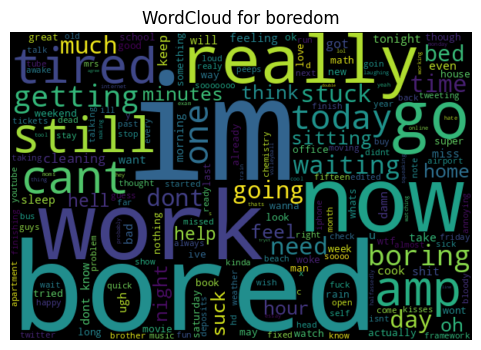

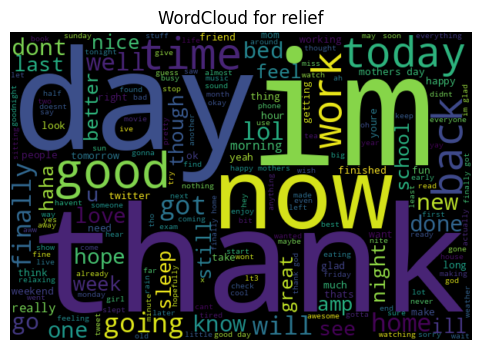

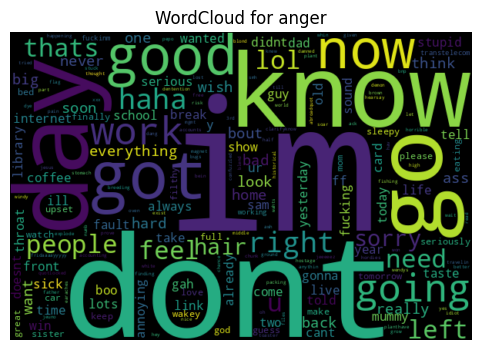

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Bar chart of sentiment distribution
plt.figure(figsize=(10,5))
sns.countplot(x="sentiment", data=df, order=df["sentiment"].value_counts().index)
plt.title("Sentiment Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# WordCloud for each sentiment
for sentiment in df["sentiment"].unique():
    wc = WordCloud(width=600, height=400).generate(" ".join(df[df["sentiment"] == sentiment]["cleaned"]))
    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment}")
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Use TF-IDF to convert cleaned text to numerical features
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')  # top 10 words only
X = vectorizer.fit_transform(df["cleaned"])

# Convert sparse matrix to DataFrame for visualization
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the top 5 rows
print(tfidf_df.head())

   day  dont  good  got   im  just  like  love  today  work
0  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0    0.0   0.0
1  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0    0.0   0.0
2  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0    0.0   0.0
3  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0    0.0   0.0
4  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0    0.0   0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.33      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.07      0.01      0.01       338
   happiness       0.35      0.34      0.34      1028
        hate       0.49      0.13      0.20       268
        love       0.52      0.36      0.42       762
     neutral       0.33      0.58      0.42      1740
      relief       0.19      0.01      0.02       352
     sadness       0.34      0.23      0.27      1046
    surprise       0.38      0.04      0.08       425
       worry       0.33      0.50      0.40      1666

    accuracy                           0.35      8000
   macro avg       0.26      0.17      0.17      8000
weighted avg       0.33      0.35      0.31      8000



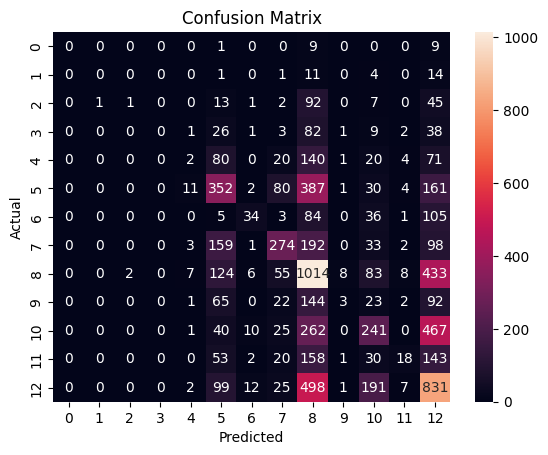

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-29-d6bc1fd24f79>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette="Set3")


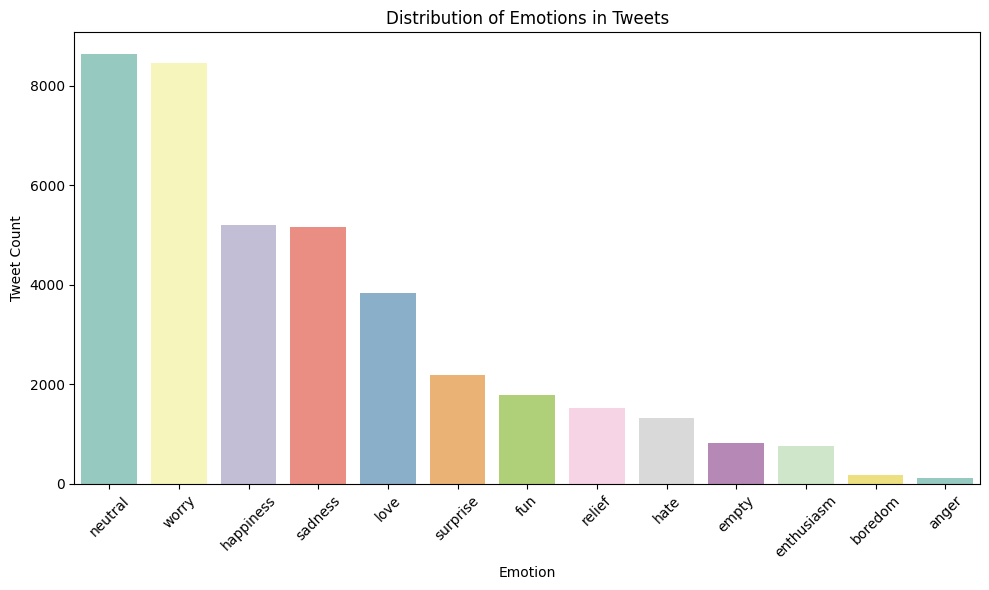

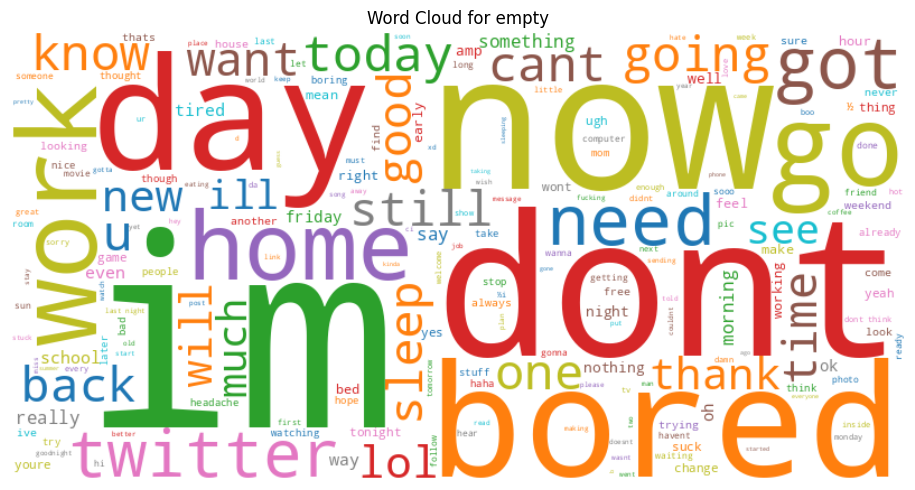

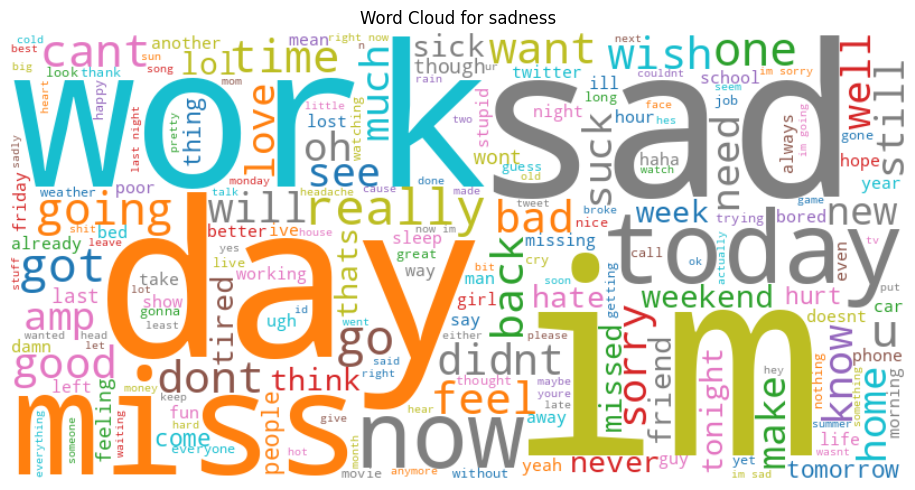

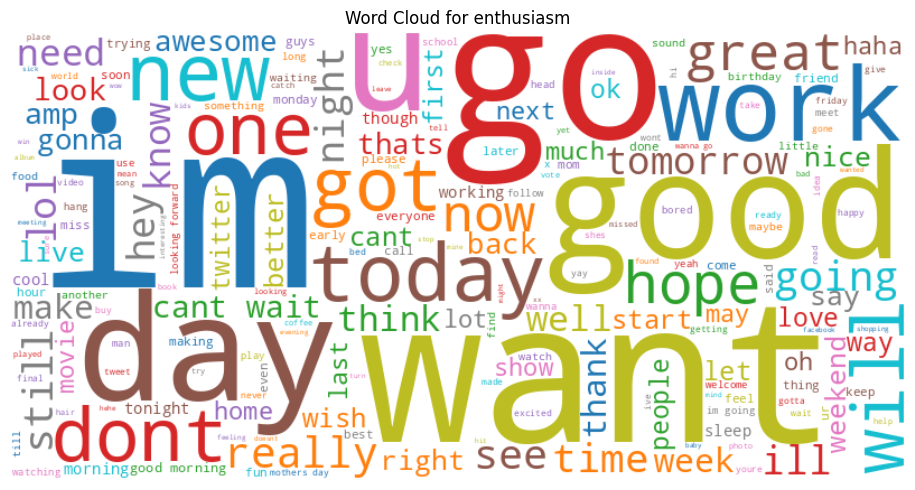

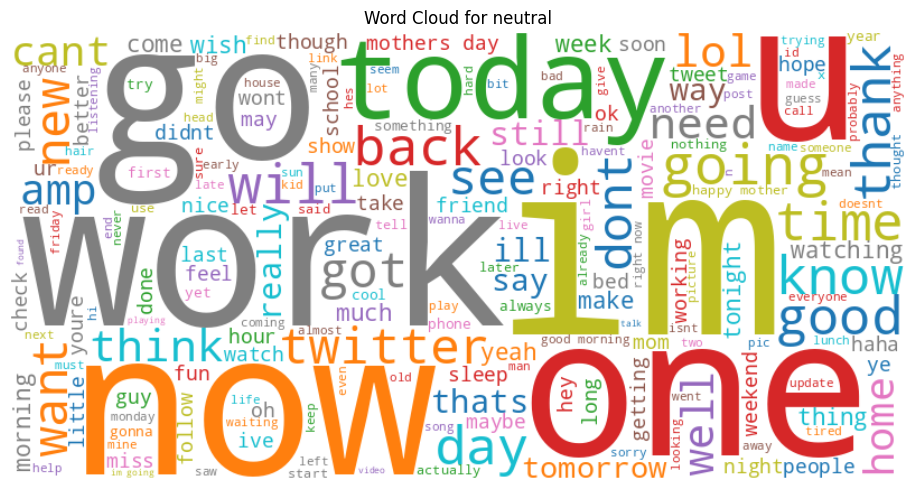

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv("tweet_emotions.csv")
df = df[['content', 'sentiment']]

# Function to clean text (optional for word clouds)
def clean_text(text):
    import re, string
    text = re.sub(r"http\S+|www\S+|@[A-Za-z0-9_]+|#[A-Za-z0-9_]+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text.lower().strip()

# Clean text
df["cleaned"] = df["content"].apply(clean_text)

# --- Plot 1: Emotion Distribution ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette="Set3")
plt.title("Distribution of Emotions in Tweets")
plt.xlabel("Emotion")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Word Clouds by Emotion ---
emotions = df['sentiment'].unique()

for emotion in emotions:
    emotion_text = " ".join(df[df['sentiment'] == emotion]['cleaned'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(emotion_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {emotion}")
    plt.tight_layout()
    plt.show()